# Quick visualisation and analysis of Sentinel 2 data over Ghana
### J Gómez-Dans (NCEO & UCL)

This notebooks presents a quick way to extract and analyse data from Sentinel 2. This is just a demo that highlights a limited regional extent around Tamale (Northern Ghana), but this could be extended to other areas.

The notebooks shows how the user can select a region of interest (ROI) online, using e.g. [GeoJSON.io](https://geojson.io), or [Google My Maps](https://www.google.com/mymaps), or any other way you want. You will then extract all the data that pertains to that region of interest and you can play around with it in normal Python.

Note that all the data is being accessed remotely, so it can take a little while for the code to complete. However, note that you are only downloading the bits that you require to process your data! It's around 150Gb of raw data that needs downloading and processing!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import gdal
gdal.UseExceptions()   

from utils import grab_holdings, extract_roi_data_ndre

img_db = grab_holdings()

In [2]:
roi="https://gist.github.com/jgomezdans/d2c80bc049b7fa8822c47236674ddea8/" + \
    "raw/9a0d697adbc244b26d140d3a7c524d0f2857336b/map.geojson"
analysis_data = extract_roi_data_ndre(img_db, roi=roi)

/home/ucfajlg/python/demo_ghana/utils.py:34: RuntimeWarning: Mean of empty slice
  if not np.isnan(np.nanmean(data1)):


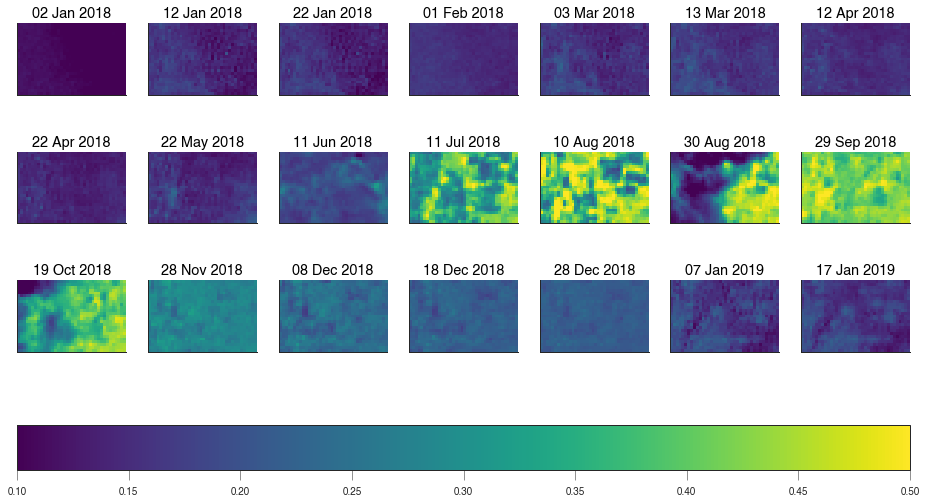

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=7, sharex=True, sharey=True, figsize=(16,9))
axs = axs.flatten()
for ii, (k,v) in enumerate(analysis_data.items()):
    im =axs[ii].imshow(v, interpolation="nearest", vmin=0.1, vmax=0.5, cmap=plt.cm.viridis)
    axs[ii].set_title(k.strftime("%d %b %Y"))
    axs[ii].set_xticks([])
    axs[ii].set_yticks([])

fig.colorbar(im, ax=axs.tolist(), orientation="horizontal")

